In [33]:
# import library
import numpy as np # Library yang digunakan untuk komputasi numerik, seperti pada array dan matriks
import matplotlib.pyplot as plt # Library yang digunakan untuk membuat visualisasi dan grafik
from scipy import stats # Library ang sering digunakan untuk berbagai analisis statistik, optimisasi, pengolahan sinyal, dan berbagai operasi matematika lainnya
import seaborn as sns # Library visualisasi data yang berdasarkan pada Matplotlib dan dirancang khusus untuk menghasilkan visualisasi data yang menarik dan informatif

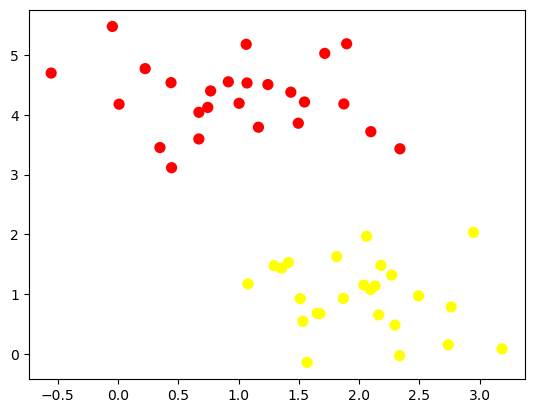

In [34]:
from sklearn.datasets import make_blobs # Library digunakan untuk membuat dataset sintetis berbentuk kelompok (clusters) dalam bentuk titik-titik data dengan distribusi yang telah ditentukan sebelumnya
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60) # Membuat dataset berdasarkan pusat-pusat (centers) tertentu dengan jumlah cluster yang diinginkan.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # Membuat scatter plot dari data sampel yang telah dihasilkan menggunakan make_blobs dengan warna titik yang ditentukan oleh label kelas y

(-1.0, 3.5)

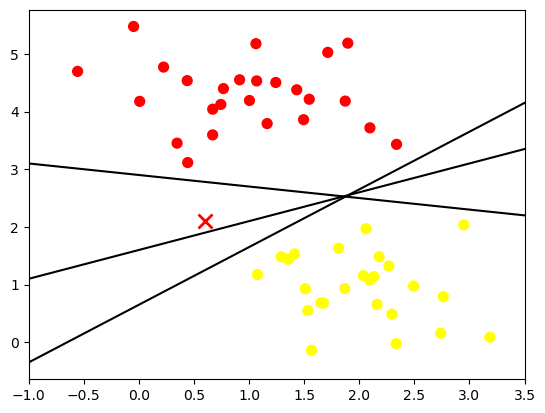

In [35]:
xfit = np.linspace(-1, 3.5) # Membuat larik numpy xfit yang berisi nilai-nilai yang berjarak merata antara -1 dan 3.5.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # Membuat scatter plot dari data sampel yang telah dihasilkan menggunakan make_blobs dengan warna titik yang ditentukan oleh label kelas y
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) # Menampilkan sebuah titik berbentuk silang (cross) berwarna merah pada koordinat (0.6, 2.1) dengan garis tepi berketebalan 2 dan ukuran 10.

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k') # Menggambar tiga garis lurus pada plot dengan parameter-parameter (m, b) yang telah ditentukan.

plt.xlim(-1, 3.5) # Mengatur batas sumbu x dengan nilai minimum -1 dan nilai maksimum 3.5.

(-1.0, 3.5)

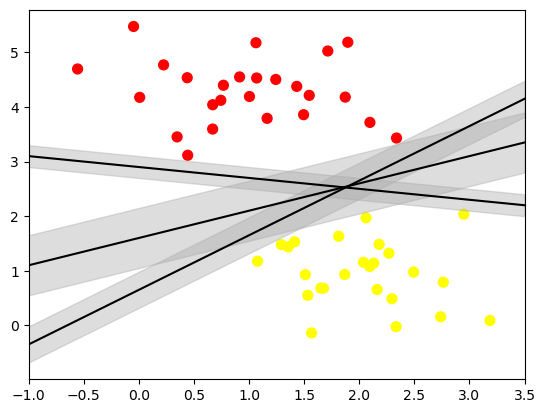

In [36]:
xfit = np.linspace(-1, 3.5) # Menghasilkan array NumPy yang berisi nilai-nilai yang berjarak merata dalam rentang dari -1 hingga 3.5.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # Membuat scatter plot dari data sampel yang telah dihasilkan menggunakan make_blobs dengan warna titik yang ditentukan oleh label kelas y

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b # Menghitung nilai yfit berdasarkan persamaan garis lurus y = mx + b, di mana m adalah koefisien kemiringan garis dan b adalah intercept garis.
    plt.plot(xfit, yfit, '-k') # Membuat plot garis lurus berdasarkan pasangan nilai xfit dan yfit yang telah dihitung sebelumnya.
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4) # Mengisi area di bawah dan di atas garis lurus yang telah digambar sebelumnya pada plot.

plt.xlim(-1, 3.5) # Mengatur batas sumbu x dengan nilai minimum -1 dan nilai maksimum 3.5.

In [37]:
from sklearn.svm import SVC # Algoritma untuk pemodelan klasifikasi yang menggunakan metode SVM
model = SVC(kernel='linear', C=1E10) # Membuat model Support Vector Machine (SVM) dengan kernel linear. 
model.fit(X, y) # Melatih (mengfit) model Support Vector Machine (SVM) pada data pelatihan. 

SVC(C=10000000000.0, kernel='linear')

In [38]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True): # Menggambar batas keputusan dari model Support Vector Machine (SVM) pada plot. 
    
    if ax is None:
        ax = plt.gca() # mendapatkan objek sumbu (axis) saat ini pada plot Matplotlib.
    xlim = ax.get_xlim() # Mendapatkan batas (nilai minimum dan maksimum) pada sumbu x dari objek sumbu ax pada plot Matplotlib.
    ylim = ax.get_ylim() # Mendapatkan batas (nilai minimum dan maksimum) pada sumbu y dari objek sumbu ax pada plot Matplotlib.
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30) # Menghasilkan array NumPy (x) yang berisi 30 nilai yang berjarak merata dalam rentang yang sama dengan batas sumbu x yang telah diperoleh sebelumnya dari objek sumbu ax.
    y = np.linspace(ylim[0], ylim[1], 30) # Menghasilkan array NumPy (y) yang berisi 30 nilai yang berjarak merata dalam rentang yang sama dengan batas sumbu y yang telah diperoleh sebelumnya dari objek sumbu ax.
    Y, X = np.meshgrid(y, x) # Membuat grid atau matriks 2D dari nilai-nilai y dan x.
    xy = np.vstack([X.ravel(), Y.ravel()]).T # Menggabungkan atau mengumpulkan nilai-nilai X dan Y menjadi sebuah matriks 2D yang berisi koordinat titik-titik dalam bentuk (x, y).
    P = model.decision_function(xy).reshape(X.shape) # menghitung nilai fungsi keputusan (decision function) dari model SVM terhadap setiap titik dalam grid xy, dan kemudian mengubah hasilnya menjadi bentuk matriks yang sesuai dengan bentuk matriks X.
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--']) # Menggambar garis kontur (contour lines) dari fungsi keputusan model Support Vector Machine (SVM) pada plot.
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none') #  Menggambar support vectors (titik-titik pelatihan yang berada di batas keputusan) pada plot. 
    ax.set_xlim(xlim) # Mengatur batas (nilai minimum dan maksimum) sumbu x pada objek sumbu ax pada plot Matplotlib.
    ax.set_ylim(ylim) # Mengatur batas (nilai minimum dan maksimum) sumbu Y pada objek sumbu ax pada plot Matplotlib.

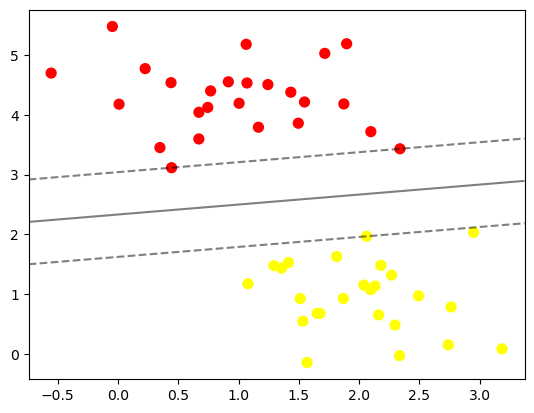

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # Membuat scatter plot dari data yang diberikan
plot_svc_decision_function(model) # Memvisualisasikan batas keputusan (decision boundary) dari model SVM

In [40]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_.

model.support_vectors_ # model SVM yang berisi koordinat dari support vectors setelah model SVM dilatih.

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

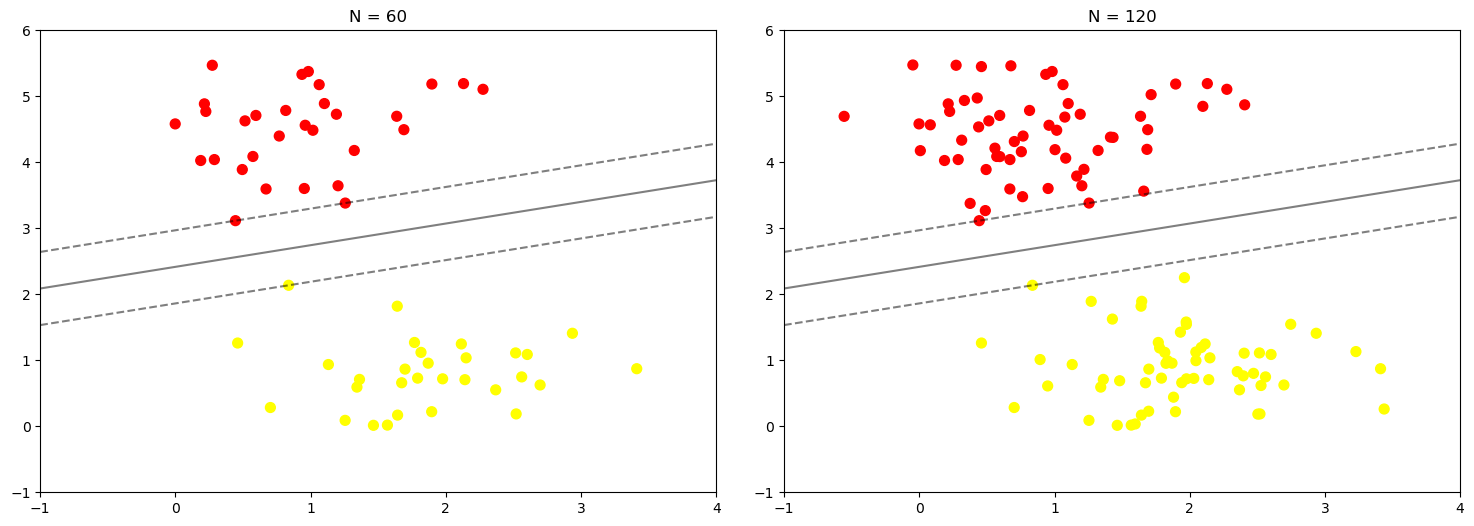

In [41]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60) # Menghasilkan data sintetis yang cocok untuk masalah klasifikasi dua kelas
    X = X[:N] # Memotong matriks fitur X menjadi hanya mengandung N baris (sampel) pertama dari data yang dihasilkan.
    y = y[:N] # Memotong matriks fitur y menjadi hanya mengandung N baris (sampel) pertama dari data yang dihasilkan.
    model = SVC(kernel='linear', C=1E10) # Membuat model SVM dengan kernel linear dan parameter C yang sangat besar.
    model.fit(X, y) # Melatih model SVM pada data yang diberikan
    
    ax = ax or plt.gca() # Memastikan memiliki objek "Axes" (sumbu) yang dapat digunakan untuk membuat plot
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # Membuat scatter plot dari data yang diberikan
    ax.set_xlim(-1, 4) # Mengatur batas sumbu x (horisontal) pada objek "Axes" dalam matplotlib
    ax.set_ylim(-1, 6) # Mengatur batas sumbu y (vertikal) pada objek "Axes" dalam matplotlib
    plot_svc_decision_function(model, ax) # Memanggil function yang dibuat sebelumnya dengan argumen model dan ax

fig, ax = plt.subplots(1, 2, figsize=(16, 6)) # Membuat sebuah gambar yang terdiri dari dua subplot (sumbu atau grafik) secara sejajar dalam satu baris
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1) # Mengatur penyesuaian tata letak dari subplot dalam gambar
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi) # Memanggil function plot_svm dengan argumen N dan axi
    axi.set_title('N = {0}'.format(N)) # Mengatur judul (title) dari objek "Axes"

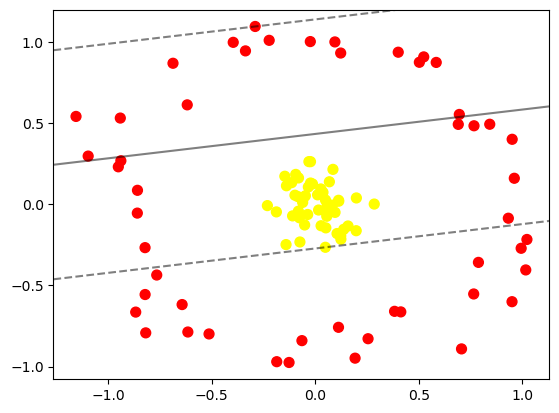

In [42]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles # Import library make_circles
X, y = make_circles(100, factor=.1, noise=.1) # Membuat dataset yang berisi dua lingkaran dengan dua kelas yang dapat dibedakan

clf = SVC(kernel='linear').fit(X, y) # Membuat model SVM dengan kernel linear dan melatihnya (fit) pada data 

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # Membuat scatter plot dari data yang diberikan
plot_svc_decision_function(clf, plot_support=False); # Memanggil function dengan argumen

In [43]:
r = np.exp(-(X ** 2).sum(1)) #  menghitung nilai dari vektor r. Pada vektor X, setiap baris mewakili satu sampel dalam dataset

In [44]:
from mpl_toolkits import mplot3d # Library yang digunakan untuk membuat plot 3D dengan Matplotlib
from ipywidgets import interact, fixed # Library yang digunakan untuk membuat interaktif pada Jupyter Notebook

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d') # Membuat objek subplot dalam 3D
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn') # Membuat scatter plot 3D dengan tiga sumbu x, y, dan z
    ax.view_init(elev=elev, azim=azim) # Mengatur sudut pandang (viewing angle) dalam plot 3D yang dibuat
    ax.set_xlabel('x') # Menambahkan label pada sumbu x dalam plot 3D
    ax.set_ylabel('y') # Menambahkan label pada sumbu y dalam plot 3D
    ax.set_zlabel('r') # Menambahkan label pada sumbu z dalam plot 3D

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y)) # Membuat elemen interaktif dalam Jupyter Notebook

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.51357964, -0.79859153],
       [ 0.93286646, -0.0859811 ],
       [-0.6877916 ,  0.86818488],
       [-0.23162183, -0.00828314],
       [-0.03692887, -0.06292148],
       [-0.05155012, -0.1274565 ],
       [-0.18640078, -0.96941767],
       [ 0.95140482,  0.40002748],
       [-0.07439504, -0.23227838],
       [ 0.52400478,  0.90736801],
       [-0.0232771 ,  0.26229051],
       [-0.13942719,  0.11390726],
       [-0.81952567, -0.79185741],
       [ 0.09538186, -0.04994793],
       [ 0.96171665,  0.1600379 ],
       [ 0.70663901, -0.89060872],
       [ 0.78835502, -0.35788844],
       [-0.02319403,  0.13066232],
       [ 0.06609192, -0.00348521],
       [-0.95202973,  0.2305924 ],
       [-0.04807512,  0.05209672],
       [ 0.11325701,  0.01886499],
       [ 0.69088464,  0.4918979 ],
       [-0.2906187 ,  1.0946563 ],
       [ 0.40072416,  0.93620719],
       [-0.86020242, -0.05447633],
       [ 0.25489353, -0.82792492],
       [

In [45]:
clf = SVC(kernel='rbf', C=1E6) # Membuat SVM dengan kernel Radial Basis Function (RBF) dan parameter regularisasi C yang besar
clf.fit(X, y) # Melatih model SVM

SVC(C=1000000.0)

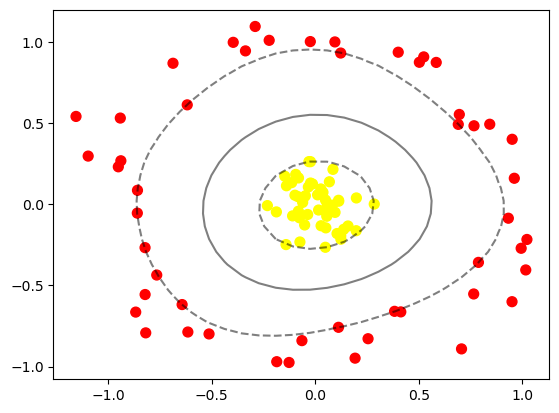

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # Membuat scatter plot dari data yang diberikan
plot_svc_decision_function(clf) # Memanggil function dengan argument clf
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none') # Menggambar titik-titik yang merupakan support vectors dalam plot data

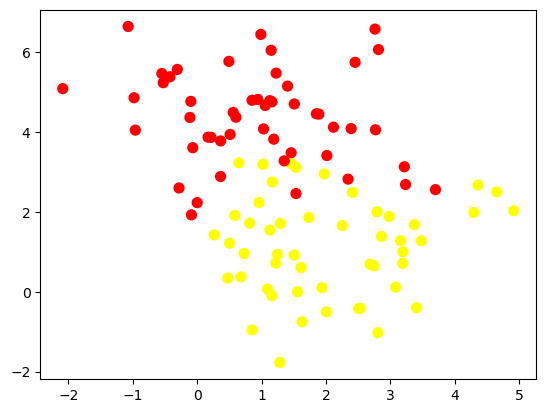

In [47]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2) # Membuat data sampel sintetis yang dapat digunakan untuk melatih model klasifikasi
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'); # Membuat scatter plot dari data yang diberikan

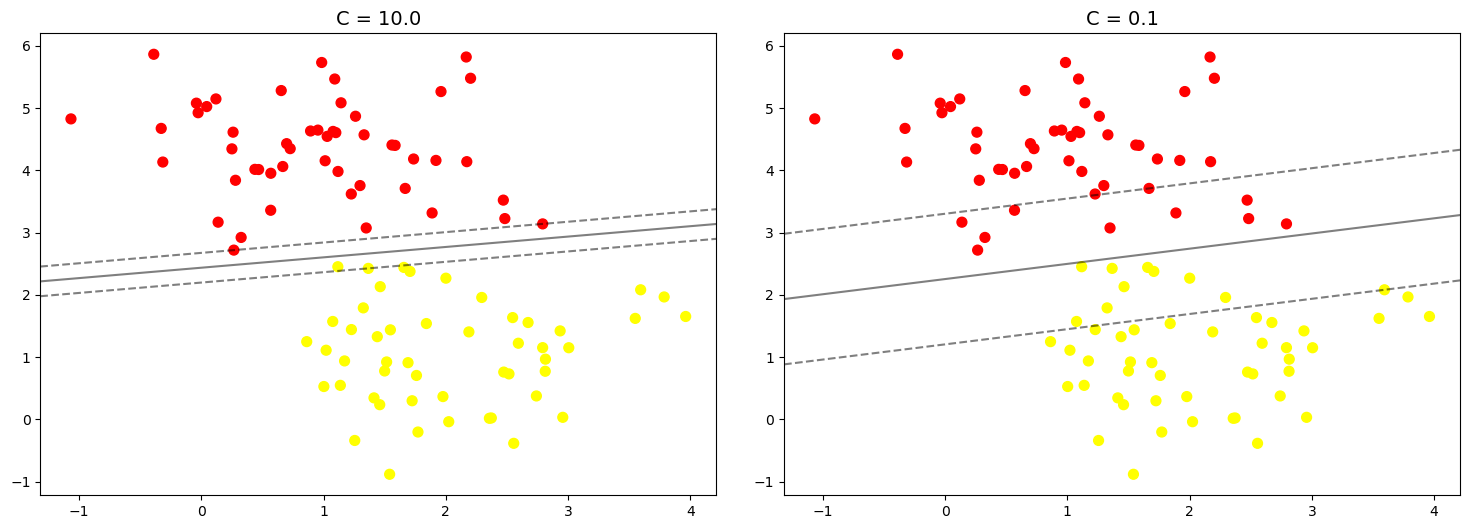

In [48]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8) # Membuat data sampel sintetis yang dapat digunakan untuk melatih model klasifikasi

fig, ax = plt.subplots(1, 2, figsize=(16, 6)) # membuat dua subplot dalam satu gambar dengan dua kolom
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1) # Mengatur jarak antara subplot-subplot dalam gambar dan mengatur margin (batas) kiri dan kanan gambar

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y) # Melatih model SVM dengan kernel linear pada data X dan label y
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # Membuat scatter plot dari data yang diberikan
    plot_svc_decision_function(model, axi) # Memanggil function dengan argument model dan axi
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none'); # Menampilkan titik-titik yang merupakan support vectors dari model SVM pada plot
    axi.set_title('C = {0:.1f}'.format(C), size=14) # Mengatur judul (title) dari subplot